#IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

LOAD DATASET

In [2]:
# Ganti path ini sesuai lokasi file kamu
file_path = "../Datasets/Datasets_Malware.csv"
df = pd.read_csv(file_path, low_memory=False)


# Lihat ukuran dan struktur awal
print("\n=== INFORMASI DATASET ===")
print("Jumlah baris:", df.shape[0])
print("Jumlah kolom:", df.shape[1])

print("\nKolom yang tersedia:")
print(df.columns.tolist())  # tampilkan kolom pertama

print("\n5 baris pertama:")
print(df.head())


=== INFORMASI DATASET ===
Jumlah baris: 21752
Jumlah kolom: 77

Kolom yang tersedia:
['md5', 'sha1', 'file_extension', 'EntryPoint', 'PEType', 'MachineType', 'magic_number', 'bytes_on_last_page', 'pages_in_file', 'relocations', 'size_of_header', 'min_extra_paragraphs', 'max_extra_paragraphs', 'init_ss_value', 'init_sp_value', 'init_ip_value', 'init_cs_value', 'over_lay_number', 'oem_identifier', 'address_of_ne_header', 'Magic', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'OperatingSystemVersion', 'ImageVersion', 'SizeOfImage', 'SizeOfHeaders', 'Checksum', 'Subsystem', 'DllCharacteristics', 'SizeofStackReserve', 'SizeofStackCommit', 'SizeofHeapCommit', 'SizeofHeapReserve', 'LoaderFlags', 'text_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData', 'text_PointerToRawData', 'text_PointerToRelocations', 'text_PointerToLineNumbers', 'text_Characteristics', 'rdata_V

In [3]:
df

,md5,sha1,file_extension,EntryPoint,PEType,MachineType,magic_number,bytes_on_last_page,pages_in_file,relocations,...,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis,Class,Category,Family
0,d5aa2b2506dd71b65307bb551a6a099d,62f4d55a1bb8396e493d7815dc44febed7161535,exe,0x108ec,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0000,...,0.0,0.0,0.0,0.0,0.0,6.0,162.0,Benign,Benign,Benign
1,8d1178cec97f96a9ede3efe2f30ef30e,ca40945a4e35d48794a5e13aacf16b8ae1caddeb,exe,0x25cf9c,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0000,...,93.0,0.0,0.0,0.0,0.0,22.0,778.0,Benign,Benign,Benign
2,c08d7afb7966f452cf5aa9283fe8880a,6f47b50480bea61ae4dfb75c12582990cc5ce770,exe,0x2a7e,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign
3,3554a3a99e7ffb57552aedcb2520f1d2,8c3d5b506a8d55f42f4c83ead3e4341255d1acfc,exe,0x64ca0,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0004,...,0.0,0.0,0.0,0.0,0.0,1.0,40.0,Benign,Benign,Benign
4,5be9511d42136df49d9501680e84109f,0a7d0c68c591db2f197b2169d226bebe6e9bdabe,exe,0x1b9ae,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,36.0,0.0,0.0,0.0,0.0,1.0,1.0,Benign,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747,3aabbbed7dd5e3589f2387ec1a62471f,067d84bef48f6abc37226c6ccb981d21f7c8b93f,exe,0x889b6,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,29.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21748,c62343c3c6463795e88fe0a2a81c82b3,02df1939b04bc7de83c3029c5eb8e9b25cc9be91,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,32.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21749,db92e74aee2f64a0b40a64c1a014e257,fde61811f7ae53f9fa59e17fb5c2c6143a48b282,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,35.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake
21750,06e50d688d5b79ffea6135c7a55402cd,ad58274e8425775b284ee1f314f879100d437340,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,...,29.0,0.0,0.0,0.0,0.0,1.0,1.0,Malware,Stealer,Snake


In [4]:
# ============================================
# STEP 3: Basic Data Info
# ============================================

print("\n=== INFORMASI UMUM ===")
df.info()

print("\n=== STATISTIK DESKRIPTIF (NUMERIC) ===")
print(df.describe())

print("\n=== NILAI KOSONG (Missing Values) ===")
print(df.isnull().sum().sort_values(ascending=False).head(10))

print("\n=== LABEL DISTRIBUTION ===")
# Asumsikan ada kolom 'label' atau 'class' atau 'malicious'
label_cols = [col for col in df.columns if col.lower() in ['label', 'class', 'target', 'malicious']]
if label_cols:
    label_col = label_cols[0]
    print(f"Kolom label terdeteksi: {label_col}")
    print(df[label_col].value_counts())
else:
    print("⚠️ Kolom label belum ditemukan secara otomatis — nanti kita tentukan manual.")


=== INFORMASI UMUM ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21752 entries, 0 to 21751
Data columns (total 77 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   md5                         21752 non-null  object 
 1   sha1                        21752 non-null  object 
 2   file_extension              21752 non-null  object 
 3   EntryPoint                  21752 non-null  object 
 4   PEType                      21752 non-null  object 
 5   MachineType                 21752 non-null  object 
 6   magic_number                21752 non-null  object 
 7   bytes_on_last_page          21752 non-null  object 
 8   pages_in_file               21752 non-null  object 
 9   relocations                 21752 non-null  object 
 10  size_of_header              21752 non-null  object 
 11  min_extra_paragraphs        21752 non-null  object 
 12  max_extra_paragraphs        21752 non-null  object 
 13  init_ss

DATA PREPROCESSING

In [5]:
# 1️⃣ Hapus kolom yang tidak relevan (ID unik)
drop_cols = ['md5', 'sha1']
df = df.drop(columns=drop_cols, errors='ignore')

# 2️⃣ Encode label 'Class' menjadi numerik
df['Class'] = df['Class'].map({'Benign': 0, 'Malware': 1})

# 3️⃣ Pisahkan fitur dan label
X = df.drop(columns=['Class'])
y = df['Class']

# 4️⃣ Identifikasi tipe kolom
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Jumlah fitur numerik: {len(num_cols)}")
print(f"Jumlah fitur kategorikal: {len(cat_cols)}")

# 5️⃣ Buat transformer untuk preprocessing
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', LabelEncoder())  # Nanti kita encode manual per kolom
])

# Karena LabelEncoder tidak bisa langsung di ColumnTransformer untuk banyak kolom,
# kita lakukan encoding manual untuk kolom kategorikal

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

print("✅ Semua kolom kategorikal berhasil di-encode.")

# 6️⃣ Standarisasi fitur numerik
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("✅ Fitur numerik berhasil di-scale.")

# 7️⃣ Split data menjadi train & test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nUkuran data train: {X_train.shape}")
print(f"Ukuran data test : {X_test.shape}")

print("\n✅ Data preprocessing selesai dan siap untuk modeling.")


Jumlah fitur numerik: 18
Jumlah fitur kategorikal: 56
✅ Semua kolom kategorikal berhasil di-encode.
✅ Fitur numerik berhasil di-scale.

Ukuran data train: (17401, 74)
Ukuran data test : (4351, 74)

✅ Data preprocessing selesai dan siap untuk modeling.


EXPLORATORY DATA ANALYSIS

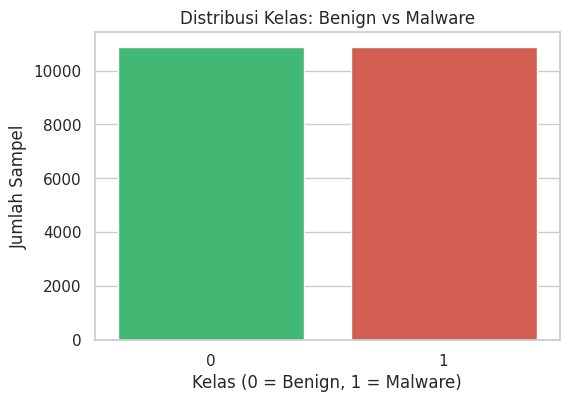


Distribusi Label:
Class
0    10876
1    10876
Name: count, dtype: int64


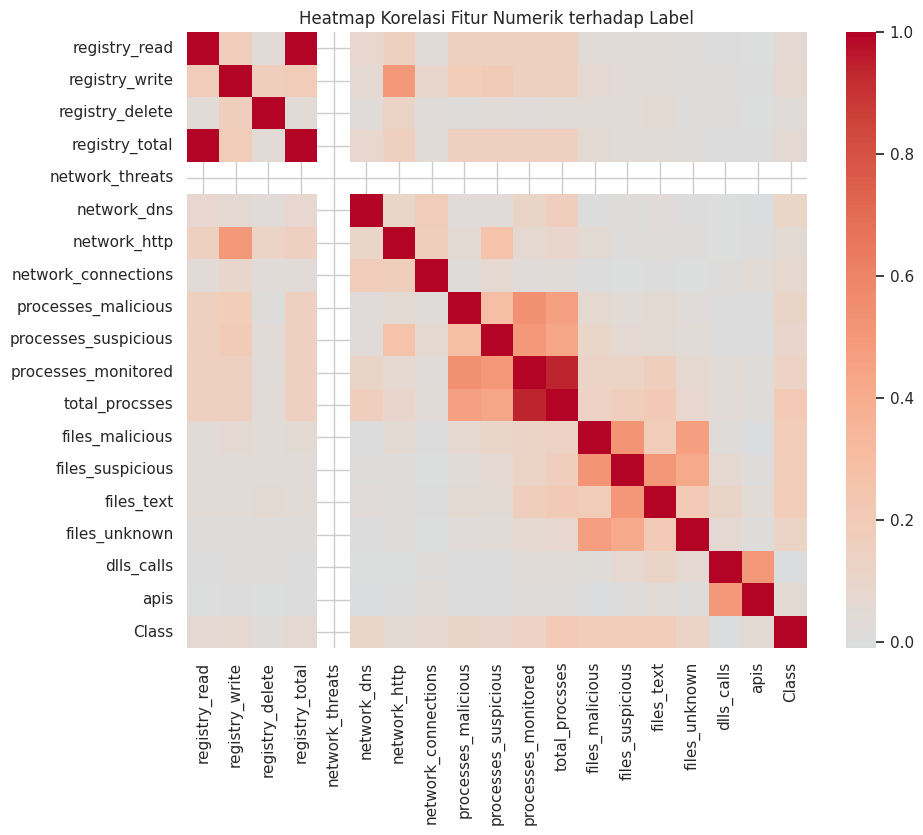


Top 10 fitur yang paling berkorelasi dengan label (positif/negatif):
Class                   1.000000
total_procsses          0.206377
files_text              0.185967
files_malicious         0.181668
files_suspicious        0.179985
processes_monitored     0.133086
files_unknown           0.127705
processes_malicious     0.113999
network_dns             0.110005
processes_suspicious    0.100080
Name: Class, dtype: float64
processes_suspicious    0.100080
network_connections     0.077697
registry_write          0.069566
registry_total          0.062291
registry_read           0.060245
network_http            0.055021
apis                    0.051610
registry_delete         0.020985
dlls_calls             -0.009951
network_threats              NaN
Name: Class, dtype: float64


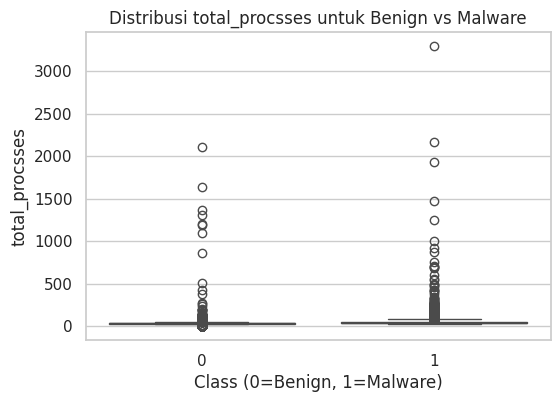

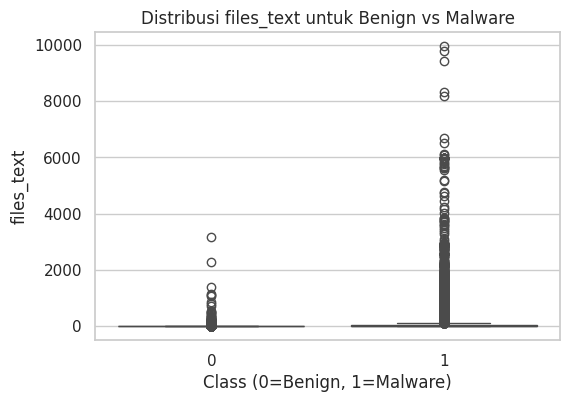

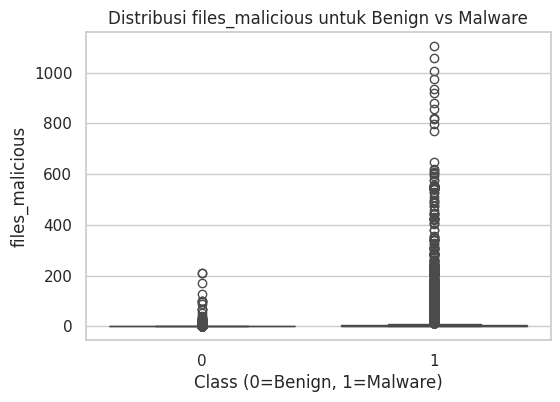

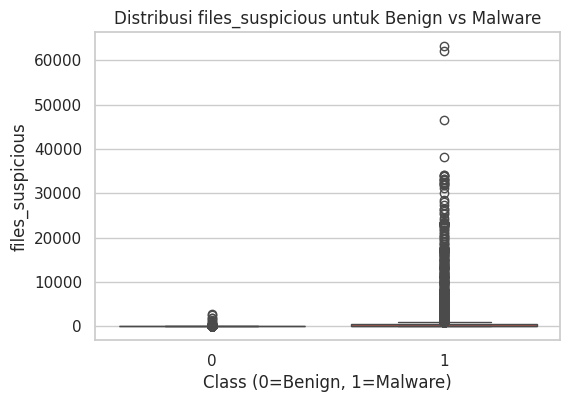

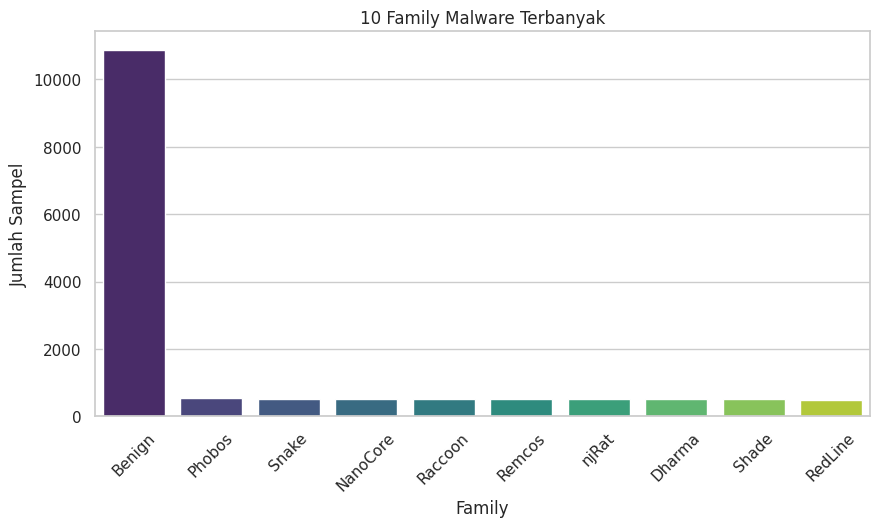


Top 10 malware families:
Family
Benign      10876
Phobos        550
Snake         527
NanoCore      520
Raccoon       518
Remcos        512
njRat         506
Dharma        505
Shade         504
RedLine       500
Name: count, dtype: int64


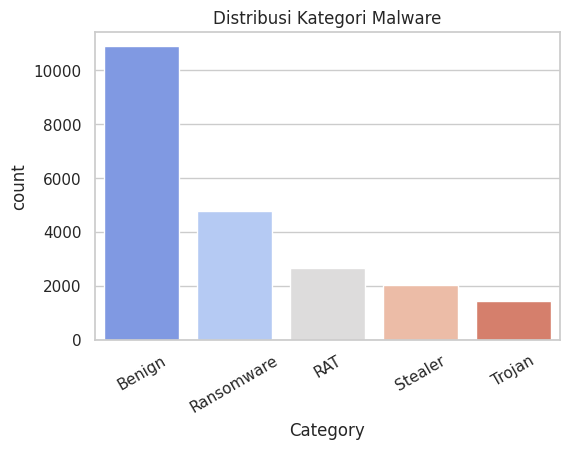

In [6]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# 1️⃣ Distribusi Label (Benign vs Malware)
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette=['#2ecc71', '#e74c3c'])
plt.title("Distribusi Kelas: Benign vs Malware")
plt.xlabel("Kelas (0 = Benign, 1 = Malware)")
plt.ylabel("Jumlah Sampel")
plt.show()

print("\nDistribusi Label:")
print(y.value_counts())

# 2️⃣ Analisis Feature Numerik — Korelasi antar fitur
corr = df[num_cols + ['Class']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Heatmap Korelasi Fitur Numerik terhadap Label")
plt.show()

# tampilkan fitur yang paling berkorelasi dengan label
corr_with_label = corr['Class'].sort_values(ascending=False)
print("\nTop 10 fitur yang paling berkorelasi dengan label (positif/negatif):")
print(corr_with_label.head(10))
print(corr_with_label.tail(10))

# 3️⃣ Visualisasi fitur penting secara univariat
top_corr_features = corr_with_label.abs().sort_values(ascending=False).head(5).index.tolist()
top_corr_features.remove('Class')

for feature in top_corr_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=df[feature], palette=['#2ecc71', '#e74c3c'])
    plt.title(f"Distribusi {feature} untuk Benign vs Malware")
    plt.xlabel("Class (0=Benign, 1=Malware)")
    plt.ylabel(feature)
    plt.show()

# 4️⃣ Analisis kategori Family dan Category
if 'Family' in df.columns:
    top_families = df['Family'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_families.index, y=top_families.values, palette='viridis')
    plt.title("10 Family Malware Terbanyak")
    plt.xticks(rotation=45)
    plt.ylabel("Jumlah Sampel")
    plt.show()
    print("\nTop 10 malware families:")
    print(top_families)

if 'Category' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='coolwarm')
    plt.title("Distribusi Kategori Malware")
    plt.xticks(rotation=30)
    plt.show()


**Feature Engineering**

In [7]:
# %% [markdown]
# # FEATURE ENGINEERING

# %%
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Hapus kolom yang tidak diperlukan ---
df = df.drop(columns=['Family', 'Class'], errors='ignore')

print(f"✅ Dataset siap untuk feature engineering ({df.shape[0]} baris, {df.shape[1]} kolom).\n")

# --- FEATURE ENGINEERING SECTION ---

# 1️⃣ Total file dan proses
df['total_files'] = df.filter(like='files_').sum(axis=1)
df['total_processes'] = df.filter(like='processes_').sum(axis=1)

# 2️⃣ Rasio file berbahaya terhadap total file
df['ratio_malicious_files'] = df['files_malicious'] / (df['total_files'] + 1e-6)

# 3️⃣ Rasio proses mencurigakan terhadap total proses
df['ratio_suspicious_processes'] = df['processes_suspicious'] / (df['total_processes'] + 1e-6)

# 4️⃣ Total aktivitas jaringan
df['total_network_activity'] = df.filter(like='network_').sum(axis=1)

# 5️⃣ Indikator boolean ancaman jaringan
df['has_network_threat'] = np.where(df['network_threats'] > 0, 1, 0)

# 6️⃣ Total kombinasi registry
df['total_registry'] = df.filter(like='registry_').sum(axis=1)

# 7️⃣ Skor risiko gabungan
df['risk_score'] = (
    df['files_malicious'] * 2
    + df['processes_malicious'] * 2
    + df['files_suspicious']
    + df['processes_suspicious']
    + df['network_threats']
)

# 8️⃣ Flag high-risk berdasarkan median risk_score
df['high_risk_flag'] = np.where(df['risk_score'] > df['risk_score'].median(), 1, 0)

print("✅ Feature engineering selesai. Fitur baru berhasil ditambahkan.\n")

# --- Tampilkan hasil ---
print("=== Contoh Data dengan Fitur Baru ===")
print(df.head())

# --- Korelasi antar fitur baru ---
new_features = [
    'total_files', 'total_processes', 'ratio_malicious_files',
    'ratio_suspicious_processes', 'total_network_activity',
    'has_network_threat', 'total_registry', 'risk_score', 'high_risk_flag'
]

print("\n=== Korelasi Antar Fitur Baru ===")
corr_new = df[new_features].corr()
print(corr_new)

✅ Dataset siap untuk feature engineering (21752 baris, 73 kolom).

✅ Feature engineering selesai. Fitur baru berhasil ditambahkan.

=== Contoh Data dengan Fitur Baru ===
  file_extension EntryPoint PEType                          MachineType  \
0            exe    0x108ec  PE32+                            AMD AMD64   
1            exe   0x25cf9c  PE32+                            AMD AMD64   
2            exe     0x2a7e   PE32  Intel 386 or later, and compatibles   
3            exe    0x64ca0  PE32+                            AMD AMD64   
4            exe    0x1b9ae   PE32  Intel 386 or later, and compatibles   

  magic_number bytes_on_last_page pages_in_file relocations size_of_header  \
0           MZ             0x0090        0x0003      0x0000         0x0004   
1           MZ             0x0090        0x0003      0x0000         0x0004   
2           MZ             0x0090        0x0003      0x0000         0x0004   
3           MZ             0x0090        0x0003      0x0004        

In [8]:
df.columns

Index(['file_extension', 'EntryPoint', 'PEType', 'MachineType', 'magic_number',
       'bytes_on_last_page', 'pages_in_file', 'relocations', 'size_of_header',
       'min_extra_paragraphs', 'max_extra_paragraphs', 'init_ss_value',
       'init_sp_value', 'init_ip_value', 'init_cs_value', 'over_lay_number',
       'oem_identifier', 'address_of_ne_header', 'Magic', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'OperatingSystemVersion',
       'ImageVersion', 'SizeOfImage', 'SizeOfHeaders', 'Checksum', 'Subsystem',
       'DllCharacteristics', 'SizeofStackReserve', 'SizeofStackCommit',
       'SizeofHeapCommit', 'SizeofHeapReserve', 'LoaderFlags',
       'text_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData',
       'text_PointerToRawData', 'text_PointerToRelocations',
       'text_PointerToLineNumbers', 'text_Characteristics',
       'rdat

# Modelling

In [9]:
df

,file_extension,EntryPoint,PEType,MachineType,magic_number,bytes_on_last_page,pages_in_file,relocations,size_of_header,min_extra_paragraphs,...,Category,total_files,total_processes,ratio_malicious_files,ratio_suspicious_processes,total_network_activity,has_network_threat,total_registry,risk_score,high_risk_flag
0,exe,0x108ec,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0000,0x0004,0x0000,...,Benign,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
1,exe,0x25cf9c,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0000,0x0004,0x0000,...,Benign,0.0,2.0,0.0,0.0,4.0,0,10.0,0.0,0
2,exe,0x2a7e,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,0x0004,0x0000,...,Benign,0.0,1.0,0.0,0.0,0.0,0,116.0,0.0,0
3,exe,0x64ca0,PE32+,AMD AMD64,MZ,0x0090,0x0003,0x0004,0x0000,0x0000,...,Benign,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0
4,exe,0x1b9ae,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,0x0004,0x0000,...,Benign,0.0,1.0,0.0,0.0,0.0,0,506.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747,exe,0x889b6,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,0x0004,0x0000,...,Stealer,0.0,4.0,0.0,0.0,5.0,0,3820.0,4.0,1
21748,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,0x0004,0x0000,...,Stealer,0.0,4.0,0.0,0.0,5.0,0,4052.0,4.0,1
21749,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,0x0004,0x0000,...,Stealer,0.0,5.0,0.0,0.0,5.0,0,6614.0,4.0,1
21750,exe,0x9a2f2,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0000,0x0004,0x0000,...,Stealer,0.0,4.0,0.0,0.0,5.0,0,3844.0,4.0,1


In [10]:
# %% [markdown]
# # MODEL SELECTION WITH BALANCED DATA (SMOTE)

# %%
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from collections import Counter

# Import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE

# --- Data Preparation (No Data Leakage) ---

# 1. Define the target and feature variables correctly
target_column = 'Category'
y_multi = df[target_column]
X_multi = df.drop(columns=[target_column, 'Class', 'Family'], errors='ignore')

# 2. Ensure all features are numeric (handling any leftovers)
cat_cols_remaining = X_multi.select_dtypes(exclude=[np.number]).columns.tolist()
if cat_cols_remaining:
    print(f"Encoding remaining categorical columns: {cat_cols_remaining}")
    for col in cat_cols_remaining:
        le = LabelEncoder()
        X_multi[col] = le.fit_transform(X_multi[col].astype(str))

# 3. Encode the multi-class target labels
le_target = LabelEncoder()
y_multi_encoded = le_target.fit_transform(y_multi)
target_names = le_target.classes_
num_classes = len(target_names)

# 4. Split data into training and testing sets (stratified)
# The test set will remain imbalanced to reflect real-world data
X_train, X_test, y_train, y_test = train_test_split(
    X_multi, y_multi_encoded, test_size=0.2, random_state=42, stratify=y_multi_encoded
)

print("--- Original Data Distribution ---")
print("Original training set shape %s" % Counter(y_train))
print("Original test set shape %s" % Counter(y_test))


2025-10-24 10:00:45.184432: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-24 10:00:45.237754: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-24 10:00:46.670013: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Encoding remaining categorical columns: ['file_extension', 'EntryPoint', 'PEType', 'MachineType', 'magic_number', 'bytes_on_last_page', 'pages_in_file', 'relocations', 'size_of_header', 'min_extra_paragraphs', 'max_extra_paragraphs', 'init_ss_value', 'init_sp_value', 'init_ip_value', 'init_cs_value', 'over_lay_number', 'oem_identifier', 'address_of_ne_header', 'Magic', 'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData', 'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase', 'SectionAlignment', 'FileAlignment', 'OperatingSystemVersion', 'ImageVersion', 'SizeOfImage', 'SizeOfHeaders', 'Checksum', 'Subsystem', 'DllCharacteristics', 'SizeofStackReserve', 'SizeofStackCommit', 'SizeofHeapCommit', 'SizeofHeapReserve', 'LoaderFlags', 'text_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData', 'text_PointerToRawData', 'text_PointerToRelocations', 'text_PointerToLineNumbers', 'text_Characteristics', 'rdata_VirtualSize', 'rdata_VirtualAddress', 'rdata_SizeOfRawData', '

In [11]:

# --- Balancing the Training Data using SMOTE ---

# 5. Apply SMOTE ONLY to the training data
print("\nApplying SMOTE to the training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\n--- Resampled (Balanced) Data Distribution ---")
print("Resampled training set shape %s" % Counter(y_train_resampled))
print("SMOTE applied successfully. Training data is now balanced.")



Applying SMOTE to the training data...

--- Resampled (Balanced) Data Distribution ---
Resampled training set shape Counter({np.int64(2): 8701, np.int64(0): 8701, np.int64(3): 8701, np.int64(1): 8701, np.int64(4): 8701})
SMOTE applied successfully. Training data is now balanced.


In [12]:

# %% [markdown]
# ### Traditional Models (Trained on Balanced Data)

# %%
# Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate models on the resampled training data and original test data
for name, model in models.items():
    print(f"\n--- Training {name} on BALANCED data ---")
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predictions are made on the original, imbalanced test set
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on original test data: {accuracy:.4f}")
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("-" * 50)

# %% [markdown]
# ### Deep Learning Models (Trained on Balanced Data)

# %%
# 6. Scale data after splitting and before feeding to DL model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled) # Fit and transform the balanced training data
X_test_scaled = scaler.transform(X_test) # Only transform the original test data

# 7. One-hot encode the target variables
y_train_dl = to_categorical(y_train_resampled, num_classes=num_classes)
y_test_dl = to_categorical(y_test, num_classes=num_classes)

# --- Define DL Model 1: Simple Neural Network ---
dl_model_1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
dl_model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\n--- Training DL Model 1 on BALANCED data ---")
dl_model_1.fit(X_train_scaled, y_train_dl, epochs=20, batch_size=64, validation_split=0.1, verbose=0)
loss1, accuracy1 = dl_model_1.evaluate(X_test_scaled, y_test_dl, verbose=0)
print(f"Model 1 Test Accuracy: {accuracy1:.4f}")

y_pred_dl_1 = np.argmax(dl_model_1.predict(X_test_scaled), axis=1)
print("Classification Report (DL Model 1):")
print(classification_report(y_test, y_pred_dl_1, target_names=target_names))
print("-" * 50)

# --- Define DL Model 2: Deeper Neural Network ---
dl_model_2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
dl_model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\n--- Training DL Model 2 on BALANCED data ---")
dl_model_2.fit(X_train_scaled, y_train_dl, epochs=20, batch_size=64, validation_split=0.1, verbose=0)
loss2, accuracy2 = dl_model_2.evaluate(X_test_scaled, y_test_dl, verbose=0)
print(f"Model 2 Test Accuracy: {accuracy2:.4f}")

y_pred_dl_2 = np.argmax(dl_model_2.predict(X_test_scaled), axis=1)
print("Classification Report (DL Model 2):")
print(classification_report(y_test, y_pred_dl_2, target_names=target_names))
print("-" * 50)


--- Training Decision Tree on BALANCED data ---
Accuracy on original test data: 0.9501
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99      2175
         RAT       0.84      0.86      0.85       529
  Ransomware       0.97      0.96      0.96       953
     Stealer       0.84      0.86      0.85       404
      Trojan       0.92      0.92      0.92       290

    accuracy                           0.95      4351
   macro avg       0.91      0.92      0.92      4351
weighted avg       0.95      0.95      0.95      4351

--------------------------------------------------

--- Training Random Forest on BALANCED data ---
Accuracy on original test data: 0.9798
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99      2175
         RAT       0.92      0.96      0.94       529
  Ransomware       0.99      0.98      0.98       953
     Stealer       0.

2025-10-24 10:01:28.406925: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected



--- Training DL Model 1 on BALANCED data ---
Model 1 Test Accuracy: 0.9487
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report (DL Model 1):
              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99      2175
         RAT       0.83      0.87      0.85       529
  Ransomware       0.96      0.95      0.96       953
     Stealer       0.85      0.88      0.87       404
      Trojan       0.94      0.93      0.94       290

    accuracy                           0.95      4351
   macro avg       0.92      0.92      0.92      4351
weighted avg       0.95      0.95      0.95      4351

--------------------------------------------------

--- Training DL Model 2 on BALANCED data ---
Model 2 Test Accuracy: 0.9497
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report (DL Model 2):
              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99      2175
         RAT       0.86      0.87      0.86  

# Evaluation

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
--- Evaluation for: Decision Tree ---


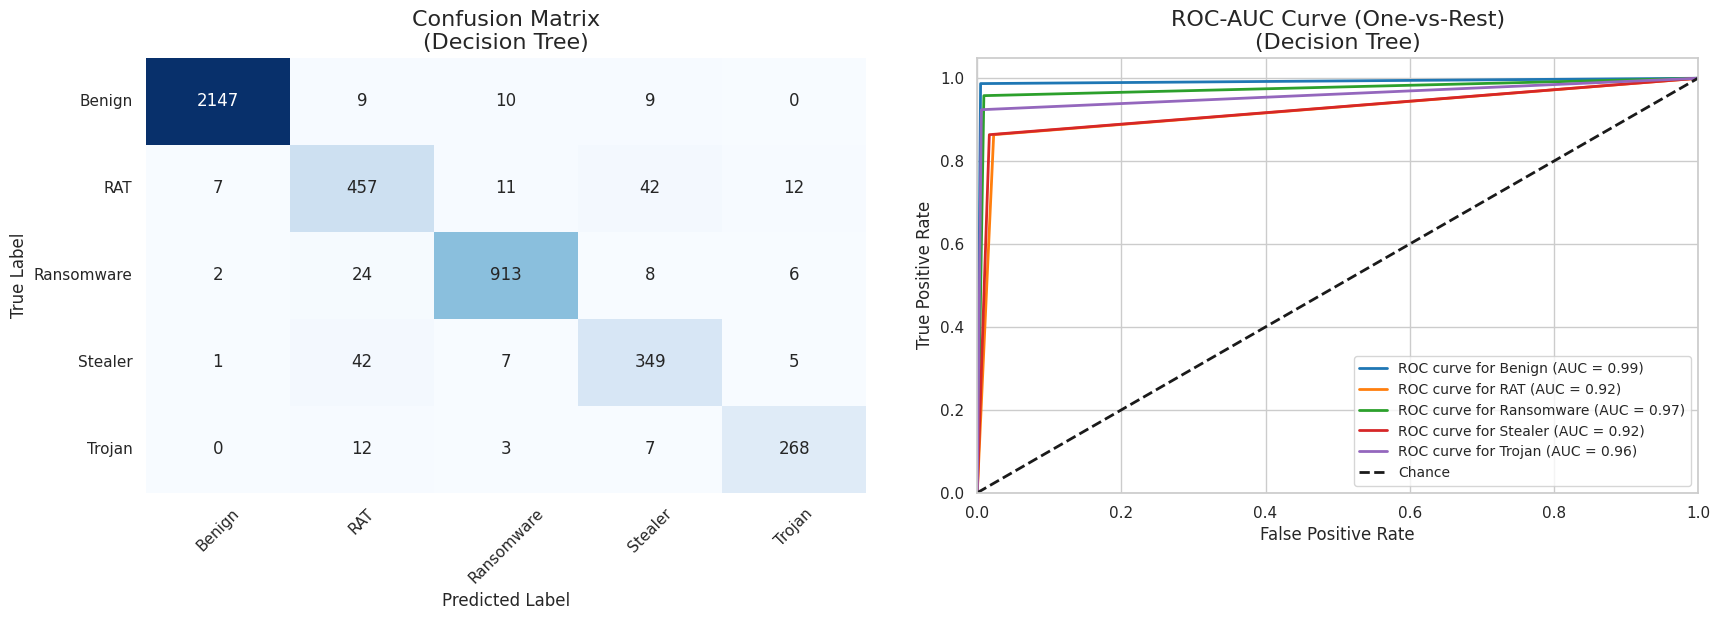

--- Evaluation for: Random Forest ---


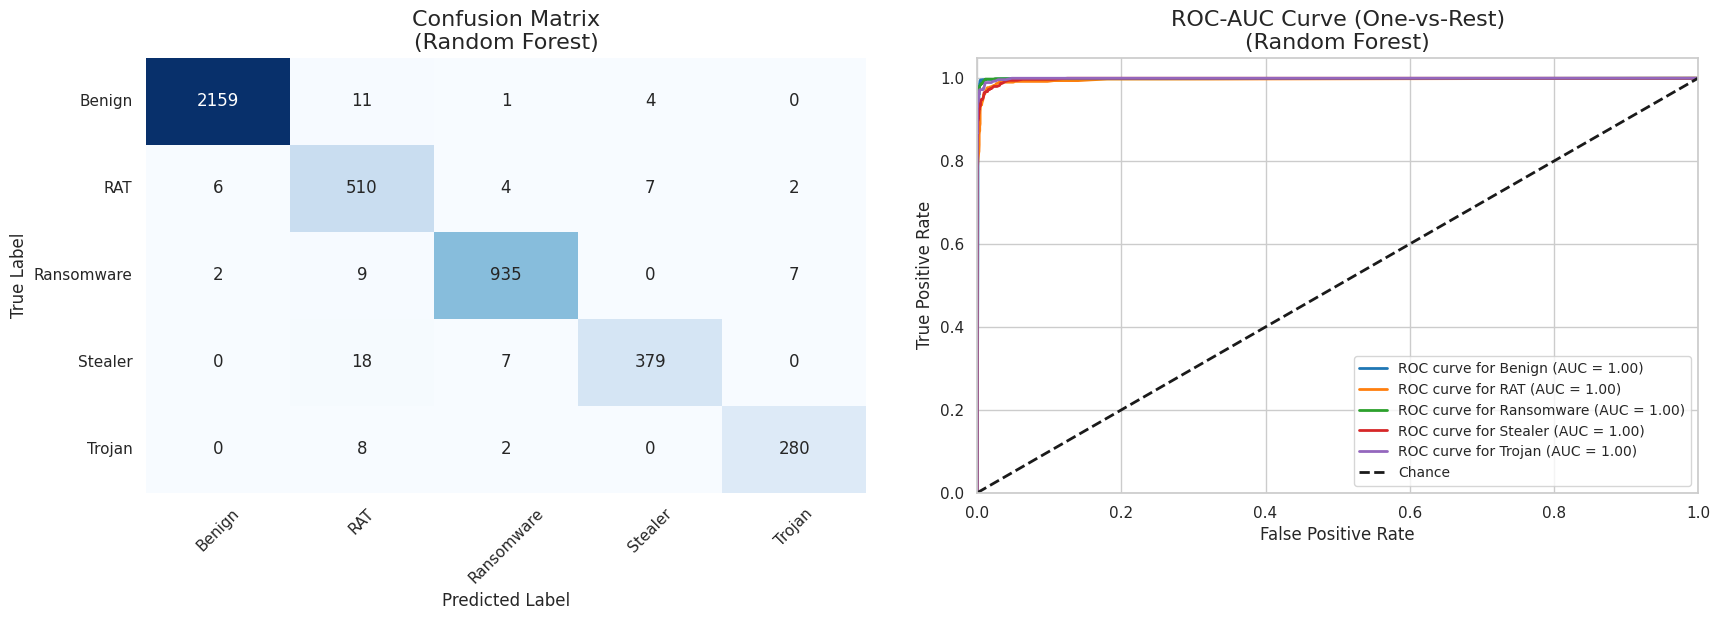

--- Evaluation for: XGBoost ---


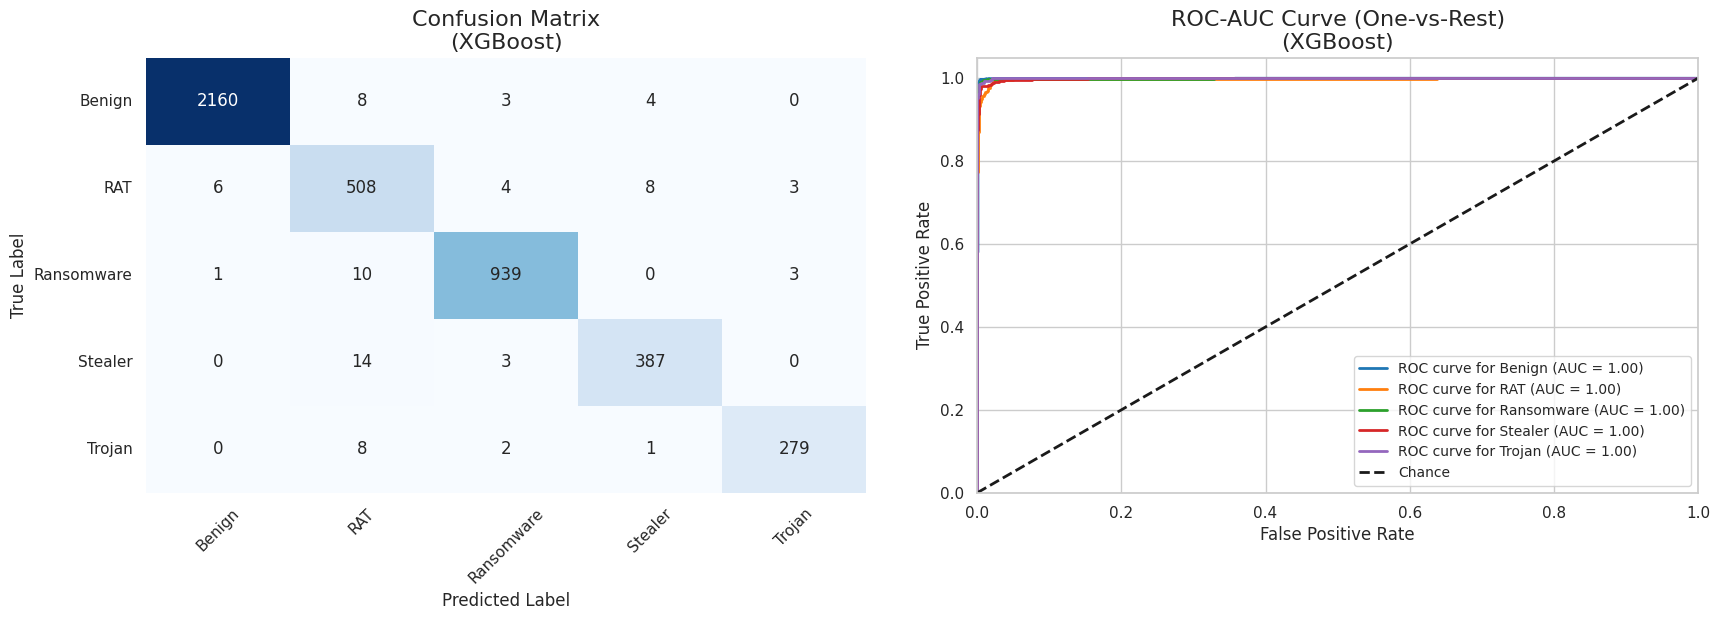

--- Evaluation for: DL Model 1 ---


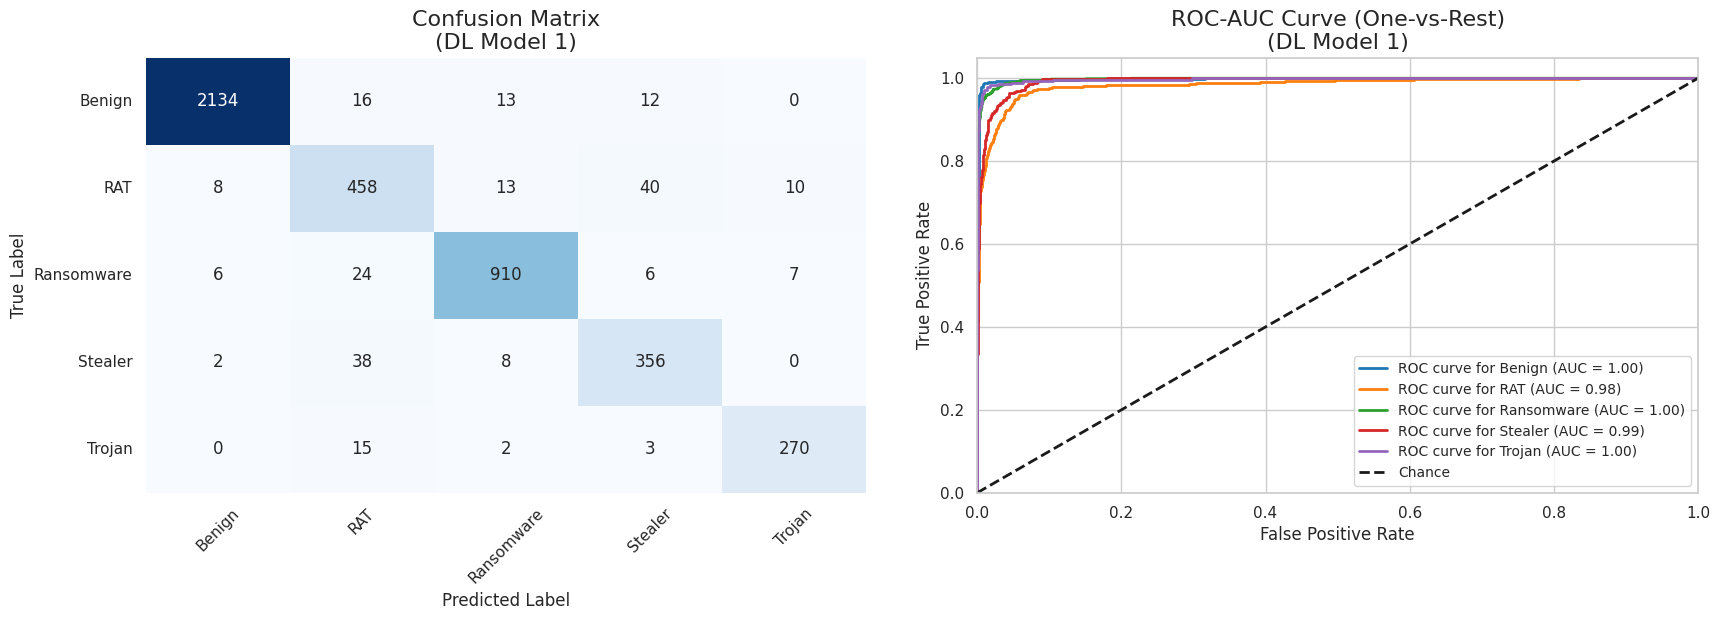

--- Evaluation for: DL Model 2 ---


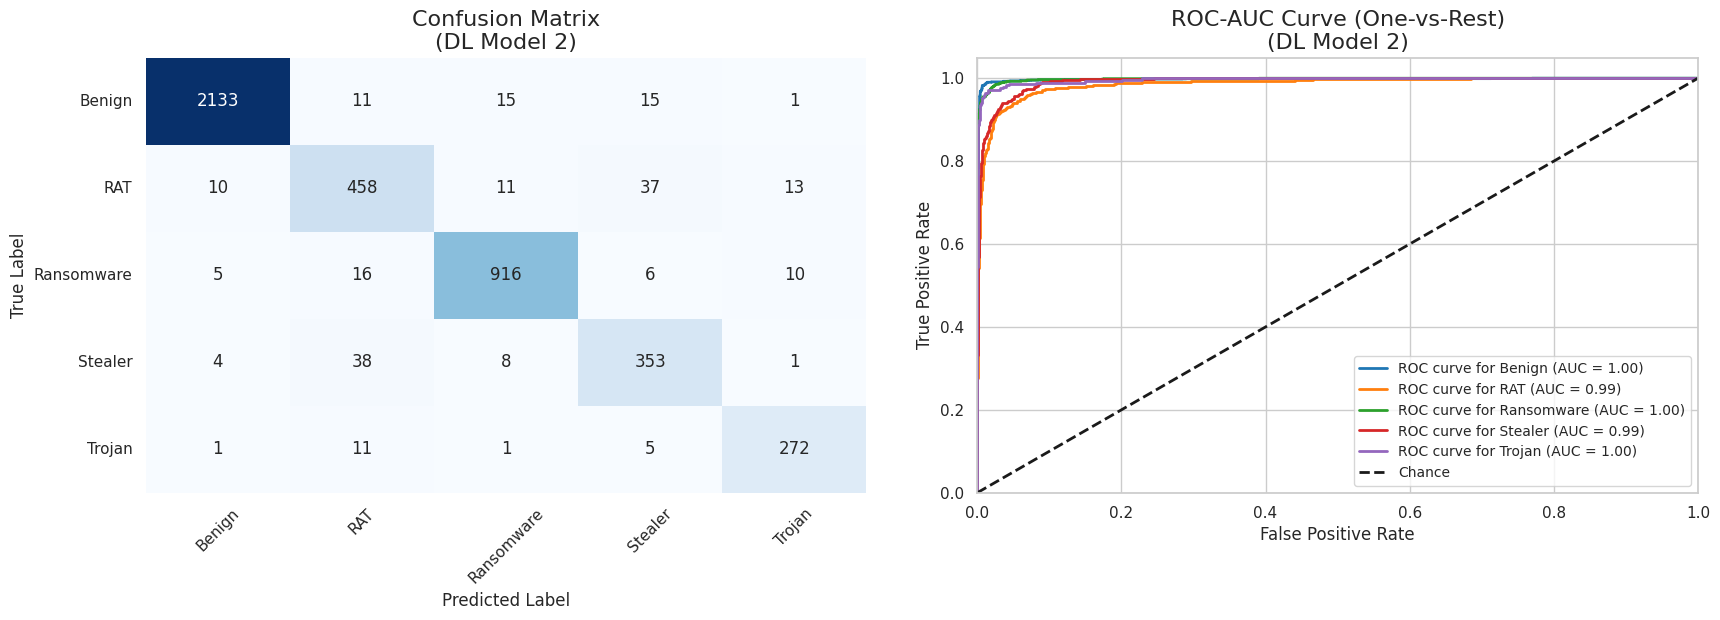

In [13]:
# %% [markdown]
# # MODEL EVALUATION VISUALIZATION

# %%
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# --- Prepare data for ROC Curve ---
# Binarize the output labels for OvR (One-vs-Rest) ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=range(num_classes))

# --- Create a dictionary of all trained models and their predictions/probabilities ---
all_models = {
    "Decision Tree": models["Decision Tree"],
    "Random Forest": models["Random Forest"],
    "XGBoost": models["XGBoost"],
    "DL Model 1": dl_model_1,
    "DL Model 2": dl_model_2
}

model_predictions = {}
for name, model in all_models.items():
    if name.startswith("DL"):
        # Use scaled data for DL models
        y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
        y_proba = model.predict(X_test_scaled)
    else:
        # Use original (unscaled) data for traditional models
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)
    model_predictions[name] = {'pred': y_pred, 'proba': y_proba}

# --- Generate and Display Plots for Each Model ---
for name, model in all_models.items():
    print(f"--- Evaluation for: {name} ---")
    
    # Get pre-calculated predictions and probabilities
    y_pred = model_predictions[name]['pred']
    y_proba = model_predictions[name]['proba']
    
    # Create a figure with two subplots, side-by-side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

    # --- Plot 1: Confusion Matrix ---
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=target_names, yticklabels=target_names, ax=ax1)
    ax1.set_title(f'Confusion Matrix\n({name})', fontsize=16)
    ax1.set_xlabel('Predicted Label', fontsize=12)
    ax1.set_ylabel('True Label', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    ax1.tick_params(axis='y', rotation=0)

    # --- Plot 2: ROC-AUC Curve (One-vs-Rest) ---
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot each class's ROC curve
    colors = cycle(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    for i, color in zip(range(num_classes), colors):
        ax2.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve for {target_names[i]} (AUC = {roc_auc[i]:0.2f})')

    # Plot the chance line
    ax2.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')
    
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('False Positive Rate', fontsize=12)
    ax2.set_ylabel('True Positive Rate', fontsize=12)
    ax2.set_title(f'ROC-AUC Curve (One-vs-Rest)\n({name})', fontsize=16)
    ax2.legend(loc="lower right", fontsize=10)
    ax2.grid(True)

    # Adjust layout and display the plots
    plt.tight_layout(pad=3.0)
    plt.show()

# Dump Model

In [14]:
# %% [markdown]
# # SAVING THE BEST PERFORMING MODEL (XGBoost)

# %%
import joblib
import os

# --- Define the best model and the filename ---
best_model = models['XGBoost'] 
filename = '../Models/xgboost_malware_classifier.joblib'

# --- Save the model to a file ---
print(f"Saving the best model (XGBoost) to '{filename}'...")
joblib.dump(best_model, filename)

print(f"Model saved successfully!")

# --- Verification (Optional but Recommended) ---
# This step demonstrates how to load the model and use it for prediction.
if os.path.exists(filename):
    print(f"\n--- Verifying the saved model ---")
    # Load the model from the file
    loaded_model = joblib.load(filename)
    print("Model loaded successfully.")
    
    # Take one sample from the test set to predict
    sample = X_test.iloc[[0]]
    
    # Make a prediction
    prediction_encoded = loaded_model.predict(sample)
    
    # Decode the prediction to get the original class name
    prediction_label = le_target.inverse_transform(prediction_encoded)
    
    print(f"\nSample prediction test:")
    print(f"Predicted Class: '{prediction_label[0]}'")
    
    # Verify against the actual label
    actual_label_encoded = y_test[0]
    actual_label = le_target.inverse_transform([actual_label_encoded])
    print(f"Actual Class:    '{actual_label[0]}'")
else:
    print("Verification failed: Model file not found.")

Saving the best model (XGBoost) to '../Models/xgboost_malware_classifier.joblib'...
Model saved successfully!

--- Verifying the saved model ---
Model loaded successfully.

Sample prediction test:
Predicted Class: 'Benign'
Actual Class:    'Benign'
